<a href="https://colab.research.google.com/github/980608/Portfolio/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 연결

In [1]:
from google.colab import drive #구글 드라이브와 연결 할 수 있는 라이브러리
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# VGG16을 활용하기 위한 라이브러리 import

In [33]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지가 정리된 파일 경로 설정

In [3]:
# 구글 드라이브안에 사용할 파일 경로를 설정
train_dir = "/content/gdrive/MyDrive/0_OCR_final_data/data_image/train"
validation_dir = "/content/gdrive/MyDrive/0_OCR_final_data/data_image/validation"
test_dir = "/content/gdrive/MyDrive/0_OCR_final_data/data_image/test"

In [ ]:
# 경로 확인
print(train_dir)
print(validation_dir)
print(test_dir)

/content/gdrive/MyDrive/0_OCR_final_data/data_image/train
/content/gdrive/MyDrive/0_OCR_final_data/data_image/validation
/content/gdrive/MyDrive/0_OCR_final_data/data_image/test


# 이미지 데이터 증식
- validation과 test 데이터는 증식을 하면 안된다
- 한 batch 마다 하나의 증식된 이미지가 생성된다.(100 batch인 경우, 100장 당 1장)
- 2000 data / 100 batch = 20 aug.
- images 100 epoch면, 20 aug.
- images x 100 epochs = 2000 aug. images



```
# ImageDataGenerator(rescale=1./255., # 이미지의 픽셀 값을 재조정하는 데 사용(0과 1 사이의 실수 값으로 변환)
                    rotation_range=10, # 이미지 회전(0~180)
                   width_shift_range=0.2, # 이미지를 수평(좌우) 방향으로 랜덤하게 평행 이동시키는 범위
                   height_shift_range=0.2, # 이미지를 수직(상하) 방향으로 랜덤하게 평행 이동시키는 범위
                   shear_range = 0.1, # y축 방향으로 각도를 증가시켜 이미지 변형
                   zoom_range = 0.1, # 확대,축소,1보다 작은 경우 확장, 1보다 큰 값을 축소
                   horizontal_flip = True, # True로 설정하는 경우 50% 확률로 이미지 수평(좌우)로 뒤집는다.
                   # vertical_flip = True 상하반전
                   fill_mode = 'nearest' # 이미지를 회전, 이동, 축소 할때 생기는 공간을 채우는 방식
                                #'nearest' : 가장 빈공간에 가장 근첩한 픽셀로 채우기
                                #'reflect' : 빈 공간 만큼 영역을 근처 공간으로 채우되 거울로 반사되는 이미지를 처럼 채운다
                                #'wrap: 빈 공간을 잘려나가 이미지로 채움
                                #'constant' : 특정 픽셀값으로 채운다. cval=0 검은색으로 채운다.
                   brightness_range=(0.1,0.9) # 밝기 조절 0~1 사이의 값, 0에 가까울수록 어둡고 1에 가까울수록 밝다.
                   channel_shift_range = 100 # R,G,B값을 -100~100 사이의 임의의 값을 더하여 변환
                   )
```



In [4]:
# 학습 데이터
train_datagen = ImageDataGenerator(
    rescale=1./255,           # 이미지의 픽셀 값을 재조정하는 데 사용(0과 1 사이의 실수 값으로 변환)
    rotation_range=40,        # 이미지 회전(0~180)
    width_shift_range=0.2,    # 이미지를 수평(좌우) 방향으로 랜덤하게 평행 이동시키는 범위
    height_shift_range=0.2,   # 이미지를 수직(상하) 방향으로 랜덤하게 평행 이동시키는 범위
    shear_range=0.2,          # y축 방향으로 각도를 증가시켜 이미지 변형
    zoom_range=0.2,           # 확대,축소,1보다 작은 경우 확장, 1보다 큰 값을 축소
    horizontal_flip=True)     # True로 설정하는 경우 50% 확률로 이미지 수평(좌우)로 뒤집는다.

# 검증 데이터
validation_datagen = ImageDataGenerator(rescale=1./255)

# 테스트 데이터
test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 주입
- 이진분류에서는 binary
- 다중분류에서는 categorical

***※ VGG는 입력데이터의 size가 (224, 224)일 것을 요구한다***


In [5]:
# 학습데이터
train_generator = train_datagen.flow_from_directory(
        train_dir,                  # 데이터 경로 설정
        target_size=(224, 224),     # 이미지 resize할 값
        batch_size=32,              # 학습할 횟수
        class_mode='categorical',   # 이진분류이기 때문에 binary
        classes=['hand','font'])    # class name 지정

# 검증데이터
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,             # 데이터 경로 설정
        target_size=(224, 224),     # 이미지 resize할 값
        batch_size=32,              # 학습할 횟수
        class_mode='categorical',   # 이진분류이기 때문에 binary
        classes=['hand','font'])    # class name 지정

# 테스트 데이터
test_generator = test_datagen.flow_from_directory(
        test_dir,                   # 데이터 경로 설정
        target_size=(224, 224),     # 이미지 resize할 값
        batch_size=32,              # 학습할 횟수
        class_mode='categorical',   # 이진분류이기 때문에 binary
        classes=['hand','font'])    # class name 지정

Found 4000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# VGG16 최종층 제거
- 우측과 같은 VGG19 모델에서 include_top=False 를 통해 마지막 부분을 제거하고 이진분류용 Dense층을 추가할 것
- Dense 층은 이미지의 일반적인 특징을 잘 포착하지 못해 일반적으로 재사용하지 않는다.


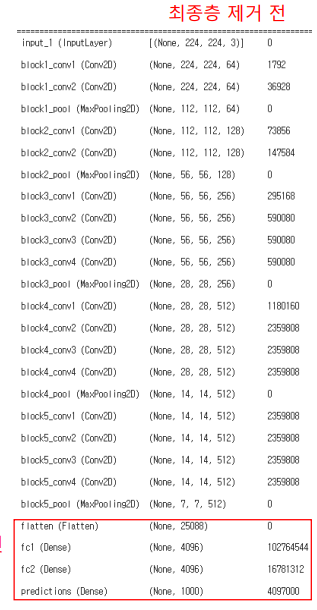

In [34]:
# include_top = False를 하여 위에 이미지 박스 부분을 제거 후 가중치를 가져온다.
vgg = VGG16(input_shape=[224, 224, 3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


# 파인튜닝(미세조정) : 모델 설계
- 전이학습과 파인튜닝 중 어떤 방식이 더 좋은지는 모델과 데이터에 따라 다르다
- 기본적으로 층의 학습 가능 여부를 다루는 부분을 다음과 같이 조절함으로 가능하다


In [35]:
# 우선 모든 층의 가중치를 학습이 가능한 형태로 만듦
vgg.trainable = True

# 마지막에서 네 번째 층까지는 가중치 동결
for layer in vgg.layers[:-4]:
  layer.trainable = False

# 결과를 Flatten 하여 Dense 층에 붙일 수 있게 한다
x = Flatten()(vgg.output)

# Flatten된 결과를 Dense층에 입력하여, 분류기 형태가 되게 한다
# 이진분류이므로 출력층 노드는 1, 활성화함수는 sigmoid이다. 다중분류에서는 softmax를 사용한다
prediction = Dense(2, activation='softmax')(x)

# FunctionalAPI를 이용하여 모델을 구성한다
model = Model(inputs=vgg.input, outputs=prediction)

# 모델 구조를 출력한다.
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# 파인튜닝 : 모델 컴파일
- 파인튜닝 시에는 학습되는 층의 가중치 학습이 조금씩 일어나게 하는 것이 좋다
- 학습률을 기본값보다 낮춰서 천천히 학습이 진행되도록 한다
- 학습률을 조절하려면 다음과 같이 옵티마이저 클래스를 불러 사용한다

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              metrics=['acc'])

# callback 설정

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#epochs 횟수동안 성능이 개선되지 않을 경우 Learning rate을 동적으로 감소 시키는 기능
rlp_cb = ReduceLROnPlateau(monitor='val_loss',mode='min',patience = 1,factor=0.3,vervose=1)
#epochs 동안 성능이 개선 되지 않은 경우 학습을 조기에 중단하는 방법
es_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#특정 조건에 맞춰서 모델 저장
checkpoint_cb = ModelCheckpoint('/content/model_checkpoint.h5', save_best_only=True, monitor='val_loss', mode='min')

# 학습

In [38]:
history = model.fit(
    train_generator,                        # 학습에 사용할 데이터
    steps_per_epoch = 20,                   # 한 epochs 동안 batch_size x steps_per_epoch = ???개의 훈련 샘플이 처리
    epochs = 100,                            # 학습 횟수
    validation_data = validation_generator, # 검증에 사용할 데이터
    validation_steps = 10,                  # 한 epochs 동안 batch_size x validation_steps = ???개의 훈련 샘플이 처리
    callbacks=[rlp_cb,es_cb]
)

Epoch 1/100
20/20 [==============================] - 18s 828ms/step - loss: 0.5149 - acc: 0.8031 - val_loss: 0.2345 - val_acc: 0.9812 - lr: 1.0000e-05
Epoch 2/100
20/20 [==============================] - 14s 679ms/step - loss: 0.1842 - acc: 0.9734 - val_loss: 0.0995 - val_acc: 0.9875 - lr: 1.0000e-05
Epoch 3/100
20/20 [==============================] - 14s 710ms/step - loss: 0.0756 - acc: 0.9875 - val_loss: 0.0369 - val_acc: 0.9906 - lr: 1.0000e-05
Epoch 4/100
20/20 [==============================] - 14s 678ms/step - loss: 0.0487 - acc: 0.9844 - val_loss: 0.0263 - val_acc: 0.9937 - lr: 1.0000e-05
Epoch 5/100
20/20 [==============================] - 14s 681ms/step - loss: 0.0279 - acc: 0.9953 - val_loss: 0.0158 - val_acc: 0.9937 - lr: 1.0000e-05
Epoch 6/100
20/20 [==============================] - 14s 707ms/step - loss: 0.0252 - acc: 0.9922 - val_loss: 0.0232 - val_acc: 0.9937 - lr: 1.0000e-05
Epoch 7/100
20/20 [==============================] - 14s 700ms/step - loss: 0.0184 - acc: 0.99

# 정확도 확인

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도
print('Accuracy of each epoch:', np.round(acc))
print()
print('Validation Accuracy of each epoch:', np.round(val_acc))
print()

# 손실값
print('Loss of each epoch:', np.round(loss, 3))
print()
print('Validation Loss of each epoch:', np.round(val_loss, 3))

Accuracy of each epoch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]

Validation Accuracy of each epoch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]

Loss of each epoch: [0.515 0.184 0.076 0.049 0.028 0.025 0.018 0.02  0.019 0.016 0.012 0.015
 0.016 0.012 0.019 0.012 0.015 0.02  0.011 0.015 0.013 0.02  0.012 0.017
 0.018 0.022 0.017 0.009 0.021]

Validation Loss of each epoch: [0.235 0.1   0.037 0.026 0.016 0.023 0.03  0.023 0.033 0.018 0.012 0.021
 0.029 0.033 0.013 0.022 0.016 0.034 0.011 0.023 0.036 0.028 0.023 0.017
 0.021 0.039 0.023 0.026 0.023]


# 정확도 그래프

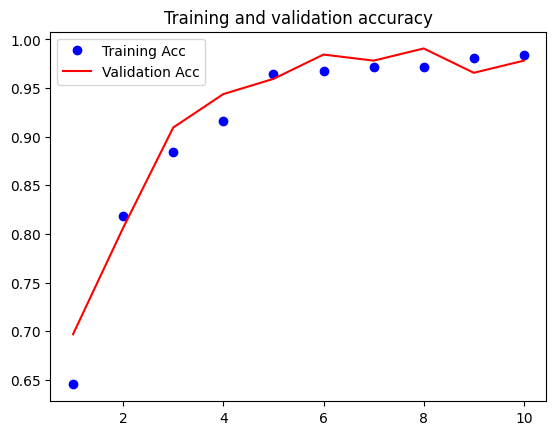

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# 손실값 그래프

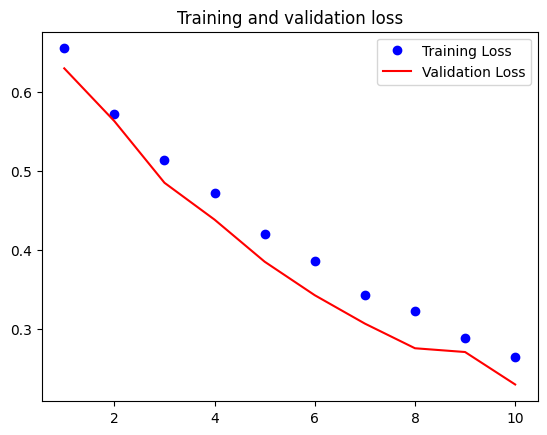

In [ ]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

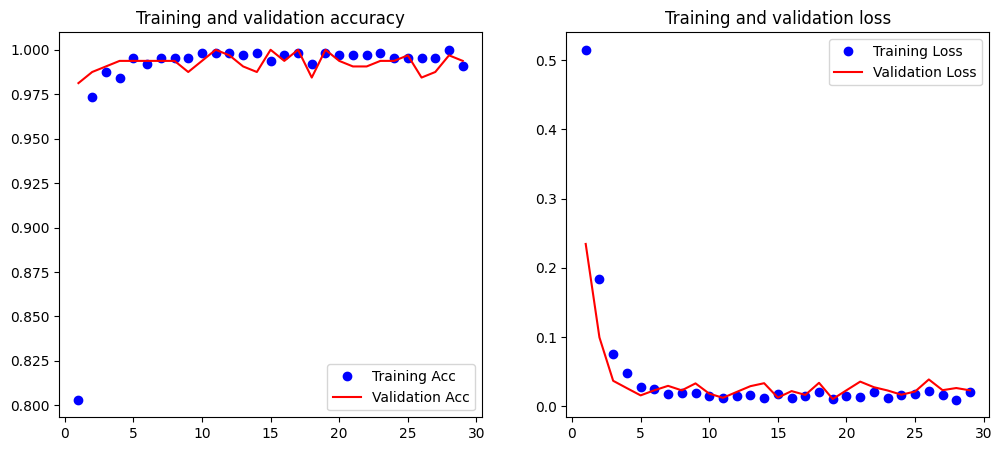

In [43]:
# 에포크 범위 설정
epochs = range(1, len(acc) + 1)

# 서브플롯 설정
plt.figure(figsize=(12, 5))

# 첫 번째 서브플롯 (Training and validation accuracy)
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

# 두 번째 서브플롯 (Training and validation loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# 그래프 표시
plt.show()

# 테스트 데이터 평가

In [44]:
model.evaluate(test_generator)

13/13 [==============================] - 2s 149ms/step - loss: 0.0380 - acc: 0.9850


[0.03803478553891182, 0.9850000143051147]

# 신규 데이터 테스트

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

img = load_img('/content/02234402.png')

#img = load_img('/content/02234403.png')
x = img_to_array(img)
x.shape
x = tf.image.resize(x,[224,224])
x.shape
x = np.array([x])
x.shape

predict = model.predict(preprocess_input(x))
list(train_generator.class_indices.keys())[np.argmax(predict)]

1/1 [==============================] - 0s 466ms/step


'font'

# 모델 저장

In [45]:
model.save('/content/gdrive/MyDrive/0_OCR_final_data/vgg19_파인튜닝.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
